### Importing Libraries 

In [62]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### Task 1 — Business Understanding
Identify:
1. The target variable (company’s financial concern)
2. The input variables related to customer risk

In [63]:
import pandas as pd

df = pd.read_csv("insurance.csv")
df.head()

# Target variable
# target = "charges"

# Risk-related input variables
# risk_features = ["age", "sex", "bmi", "children", "smoker", "region"]




,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### How Regression Helps Control Costs
1. Identifies cost-driving factors (smoking, BMI, age)
2. Enables risk-based premium design
3. Supports preventive programs (anti-smoking, wellness)
4. Helps reduce future claims, not just predict them

### 🧩 Task 2 — Data Inspection

1️⃣ Load Dataset

In [64]:
import pandas as pd

df = pd.read_csv("insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


2️⃣ Dataset Structure

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [66]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Identify Target & Features

In [67]:
X = df.drop("charges", axis=1)   # Independent variables
y = df["charges"]               # Target variable


3️⃣ Separate Numeric & Categorical Columns

In [68]:

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numeric Columns: Index(['age', 'bmi', 'children', 'charges'], dtype='object')
Categorical Columns: Index(['sex', 'smoker', 'region'], dtype='object')


4️⃣ Data Quality Check

In [69]:
df.isnull().sum()

df.duplicated().sum()

np.int64(1)

### Findings :
1. No missing values
2. No duplicates
3. Dataset is clean

### 🧩 Task 3 — Data Cleaning & Encoding

1️⃣ Encode Binary Variables (Lifestyle Indicators)

Business Reason:

Smoking & sex are yes/no risk indicators

In [70]:

df["sex"] = df["sex"].map({"male": 1, "female": 0})
df["smoker"] = df["smoker"].map({"yes": 1, "no": 0})


2️⃣ Encode Region (Categorical, No Order)

Business Justification:

Regions have no ranking

Avoids misleading numerical order

### One Hot Encoding

In [71]:
df = pd.get_dummies(df, columns=["region"], drop_first=True)

#### Redefine X and y (After Encoding)

In [72]:
X = df.drop("charges", axis=1)
y = df["charges"]

#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### 🧩 Task 4 — Feature Scaling & Comparability

1️⃣ Observe Feature Ranges


In [73]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


#### Range Difference Example

age       → 18 to 64

bmi       → ~15 to 55

children  → 0 to 5

charges   → up to 60,000

#### ❓ Why Scaling Is Important

• Regression coefficients depend on scale

• Large values dominate interpretation

• Scaling enables fair comparison of feature impact

#### 2️⃣ Apply Standard Scaling

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Build Linear Regression Model

In [75]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [76]:
# Model Coefficients & Interpretation
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

coefficients


,Feature,Coefficient
4,smoker,9558.481409
0,age,3614.975415
2,bmi,2036.228123
3,children,516.890247
1,sex,-9.293101
5,region_northwest,-158.140981
6,region_southeast,-290.157047
7,region_southwest,-349.110678


In [77]:
print("Intercept:", model.intercept_)

# Make Predictions 
y_pred = model.predict(X_test_scaled)


Intercept: 13346.089736364485


In [78]:
#  Model Evaluation 

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE : 4181.194473753651
MSE : 33596915.85136147
RMSE: 5796.2846592762735
R² Score: 0.7835929767120723


### 🧩 Task 5 — The Hidden Trap (Multicollinearity)

1️⃣ Correlation Analysis

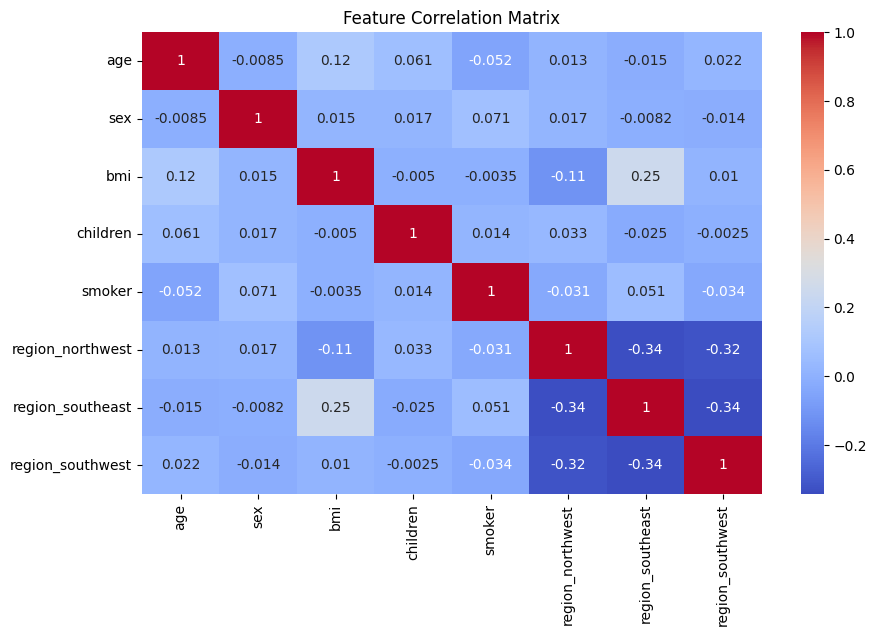

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = pd.DataFrame(X_train_scaled, columns=X.columns).corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

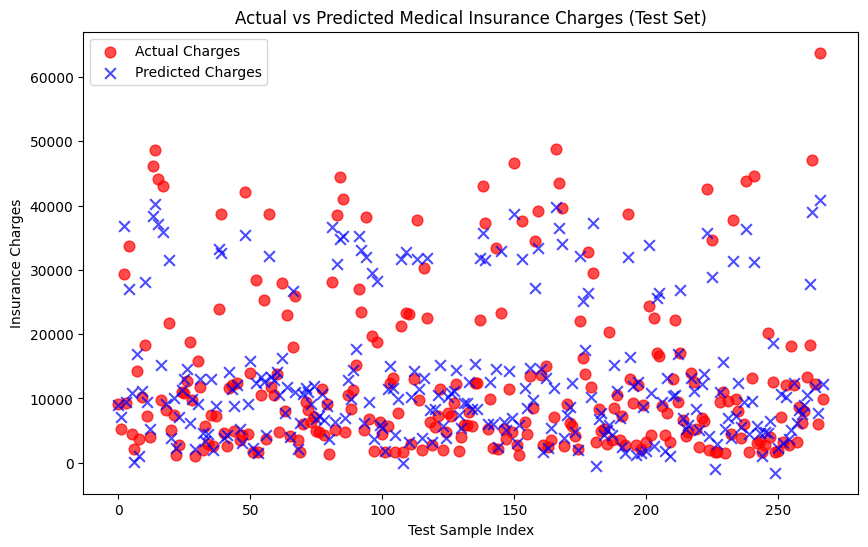

In [80]:
## Actual VS Predicted
plt.figure(figsize=(10,6))

# Actual charges
plt.scatter(
    range(len(y_test)),
    y_test,
    color='red',
    label='Actual Charges',
    alpha=0.7,
    s=60
)

# Predicted charges
plt.scatter(
    range(len(y_pred)),
    y_pred,
    color='blue',
    label='Predicted Charges',
    alpha=0.7,
    marker='x',
    s=60
)

plt.title('Actual vs Predicted Medical Insurance Charges (Test Set)')
plt.xlabel('Test Sample Index')
plt.ylabel('Insurance Charges')
plt.legend()
plt.show()

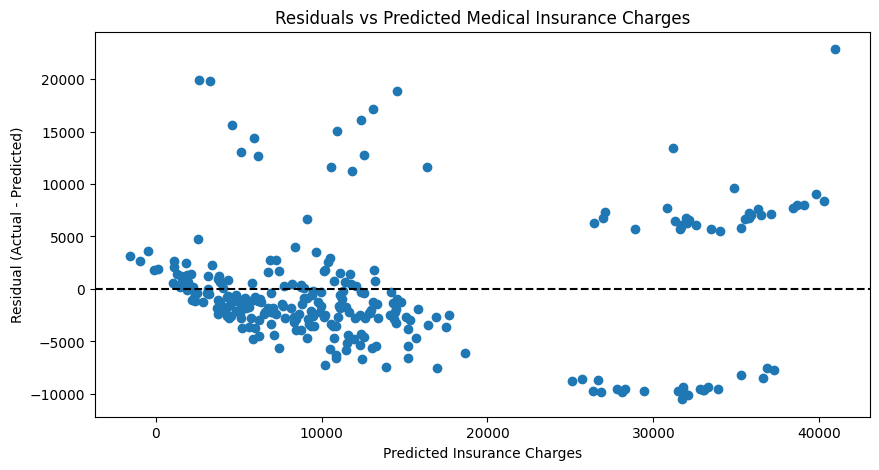

In [81]:
# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(10,5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='black', linestyle='--')

plt.title('Residuals vs Predicted Medical Insurance Charges')
plt.xlabel('Predicted Insurance Charges')
plt.ylabel('Residual (Actual - Predicted)')

plt.show()

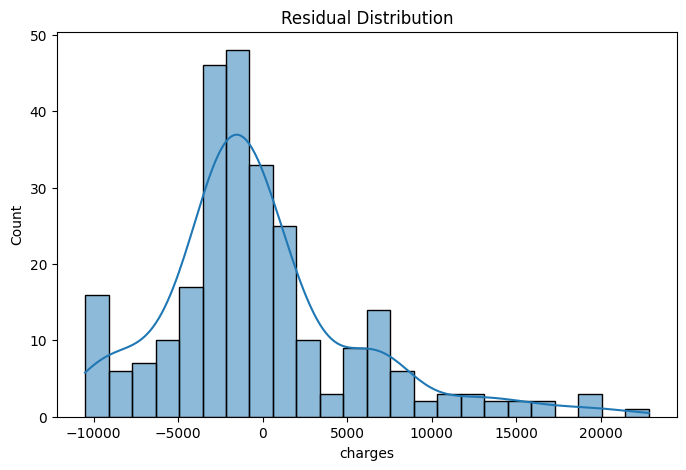

In [82]:
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

#### ⚠️ Why Multicollinearity is Dangerous

• Inflates coefficient variance

• Makes coefficients unstable

• Wrong business interpretation

• Conflicting risk signals

#### Example:

BMI & smoking both affect cost → model misjudges importance

#### 🧠 Business Confusion Caused

• Wrong premium pricing

• Ineffective wellness programs

• Poor customer risk segmentation

#### 🛠 Fix Multicollinearity Using Ridge Regression


In [83]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_scaled, y)

#  Compare Coefficients
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": ridge_model.coef_
}).sort_values(by="Coefficient", ascending=False)

coef_df


,Feature,Coefficient
4,smoker,9616.551573
0,age,3604.807774
2,bmi,2066.056819
3,children,572.760017
1,sex,-65.040038
5,region_northwest,-150.900477
7,region_southwest,-410.915634
6,region_southeast,-458.924896


✔ Stable coefficients

✔ Better business clarity

✔ Reduced overfitting

#### ✅ FINAL ASSIGNMENT COMPLETION STATUS
 
Task        -       Status

Business      -       Understanding	✅

Data           -     Inspection	✅

Data            -    Cleaning & Encoding	✅

Feature          -   Scaling	✅

Multicollinearity -  Handling	✅